In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from games.modules.experimental_statistical_testing.experimental_statistical_tests import (anova,
                                                  tukeys_hsd,
                                                  t_tests,
                                                  BH_correction,
                                                  run_corrected_t_tests,
                                                  repeated_measures_anova)
plt.style.use("/Users/kdreyer/Documents/Github/HBS_GAMES2/src/games/paper.mplstyle.py")
path = "/Users/kdreyer/Documents/Github/HBS_GAMES2/src/games/modules/experimental_statistical_testing/"
path_exp_data = path + "experimental_data/"
path_stats = path + "results/"
path_plots = path + "experimental_data_plots/"

/Users/kdreyer/Documents/Github/HBS_GAMES2/.venv/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Figure 1

### Figure 1A plot

In [ ]:
df_plot_pO2 = pd.read_csv(path_exp_data+"plot_figure1A_pO2.csv")
# print(df_plot_pO2)
df_plot_pctO2 = pd.read_csv(path_exp_data+"plot_figure1A_pctO2.csv")
# print(df_plot_pctO2)

In [ ]:
# create figure 2D plot
blues = plt.cm.get_cmap("Blues", 10)
fig, ax = plt.subplots(1, 1, figsize=(3.25, 3), sharey=True)
ax2 = ax.twinx()
ax.plot(df_plot_pO2["time_min"], df_plot_pO2["media_0_pO2"], color="gray", linestyle="none", marker="o", markersize="1", label="0 uL")
# ax.plot(df_plot_pO2["time_min"], df_plot_pO2["media_125_pO2"], color=blues(3), linestyle="none", marker="o", markersize="1", label="125 uL")
# ax.plot(df_plot_pO2["time_min"], df_plot_pO2["media_250_pO2"], color=blues(4), linestyle="none", marker="o", markersize="1", label="250 uL")
ax.plot(df_plot_pO2["time_min"], df_plot_pO2["media_500_pO2"], color=blues(5), linestyle="none", marker="o", markersize="1", label="500 uL")
ax.plot(df_plot_pO2["time_min"], df_plot_pO2["media_750_pO2"], color=blues(7), linestyle="none", marker="o", markersize="1", label="750 uL")
# ax.plot(df_plot_pO2["time_min"], df_plot_pO2["media_1000_pO2"], color=blues(8), linestyle="none", marker="o", markersize="1", label="1000 uL")
# ax.plot(df_plot_pO2["time_min"], df_plot_pO2["media_1500_pO2"], color=blues(9), linestyle="none", marker="o", markersize="1", label="1500 uL")
# ax2.plot(df_plot_pctO2["time_min"], df_plot_pctO2["pct_O2"], color="k", linestyle="-", marker="o", markersize="1", label="Air")
ax.set_xlabel("Time (min)")
ax.set_xticks([0, 60, 120, 180, 240])
ax.set_ylabel("pO2 at bottom of well (mmHg)")
ax.set_yticks([0, 50, 100, 150])
ax.spines[['right']].set_visible(True)
ax.set_box_aspect(1)
ax2.set_ylabel("% O2 in incubator")
ax2.set_yticks([0, 10, 20])
ax2.set_ylim(top=20)
plt.show()
# plt.savefig(path_plots+"figure_1a.svg")

### Figure 1C statistical tests

In [ ]:
df_all = pd.read_csv(path_exp_data+"Exp03_main.csv")
# print(df_all)

In [ ]:
### red fluorescent protein ###
# select data for red only
df_red = df_all[df_all["condition"].str.contains("red")]
# print(df_red)
# run t-tests
red_comparisons = [
    ["red_normoxic", "red_hypoxic_ice"], 
    ["red_normoxic", "red_hypoxic_rt"], 
    ["red_normoxic", "red_hypoxic_ox_ice"]
]
# t_test_df = run_corrected_t_tests(path_stats, "figure1c_red", "rfu", df_all, red_comparisons)
# print(t_test_df)

# run 1 way anova
# anova_table = anova(path_stats, "figure1c_red", df_red, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
# tukeys_tables = tukeys_hsd(path_stats, "figure1c_red", "rfu", df_red, ["condition"])
# for table in tukeys_tables:
#     print(table)

In [ ]:
### green fluorescent protein ###
# select data for green only
df_green = df_all[df_all["condition"].str.contains("green")]
# run t-tests
green_comparisons = [
    ["green_normoxic", "green_hypoxic_ice"], 
    ["green_normoxic", "green_hypoxic_rt"], 
    ["green_normoxic", "green_hypoxic_ox_ice"]
]
# t_test_df = run_corrected_t_tests(path_stats, "figure1c_green", "rfu", df_all, green_comparisons)
# print(t_test_df)

# run 1 way anova
# anova_table = anova(path_stats, "figure1c_green", df_green, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
tukeys_tables = tukeys_hsd(path_stats, "figure1c_green", "rfu", df_green, ["condition"])
for table in tukeys_tables:
    print(table)

In [ ]:
### blue fluorescent protein ###
# select data for green only
df_blue = df_all[df_all["condition"].str.contains("blue")]
# run t-tests
blue_comparisons = [
    ["blue_normoxic", "blue_hypoxic_ice"], 
    ["blue_normoxic", "blue_hypoxic_rt"], 
    ["blue_normoxic", "blue_hypoxic_ox_ice"]
]
# t_test_df = run_corrected_t_tests(path_stats, "figure1c_blue", "rfu", df_all, blue_comparisons)
# print(t_test_df)

# run 1 way anova
# anova_table = anova(path_stats, "figure1c_blue", df_blue, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
tukeys_tables = tukeys_hsd(path_stats, "figure1c_blue", "rfu", df_blue, ["condition"])
for table in tukeys_tables:
    print(table)

### Figure 1C plot

In [11]:
df_data_plot = pd.read_csv(path_exp_data+"plot_figure1C_supp_figure3.csv")
df_data_main = df_data_plot[~df_data_plot["condition"].str.contains("f")]
# print(df_data_main)

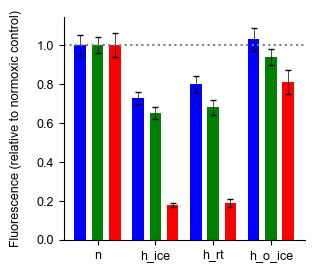

In [18]:
# format data and labels for plotting
conditions = df_data_main["condition"].to_list()
plot_xlabels = [conditions[i] for i in range(0, len(conditions), 3)]
rfu = df_data_main["rfu"].to_list()
plot_rfu = [rfu[i:i + 3] for i in range(0, len(rfu), 3)]
std_err = df_data_main["std_err"].to_list()
plot_std_err = [std_err[i:i + 3] for i in range(0, len(std_err), 3)]

# create plot
fig, ax = plt.subplots(1, 1, figsize=(3.25, 2.75))
x_ticks = []
for index, rfu_list in enumerate(plot_rfu[:4]):
    ax.bar(index-0.3, rfu_list[2], width=0.2, color="blue", align="center", label="blue")
    ax.errorbar(index-0.3, rfu_list[2], plot_std_err[index][2], color="k", capsize=2, elinewidth=0.5)
    ax.bar(index, rfu_list[1], width=0.2, color="green", align="center", label="green")
    ax.errorbar(index, rfu_list[1], plot_std_err[index][1], color="k", capsize=2, elinewidth=0.5)
    ax.bar(index+0.3, rfu_list[0], width=0.2, color="red", align="center", label="red")
    ax.errorbar(index+0.3, rfu_list[0], plot_std_err[index][0], color="k", capsize=2, elinewidth=0.5)
    x_ticks.append(index)
ax.axhline(y=1.0, color="grey", linestyle="dotted", linewidth=1.5)
ax.set_ylabel("Fluorescence (relative to normoxic control)")
ax.set_xticks(x_ticks)
ax.set_xticklabels(plot_xlabels[:4])

plt.show()
# plt.savefig(path_plots+"figure_1c.svg")

### Figure 1D statistical tests

In [6]:
df_data = pd.read_csv(path_exp_data+"Exp04_pt1_dox_DsR.csv")
# print(df_data)

In [8]:
# format df for t-test code
# df_data["condition"] = df_data["condition"] + "_" + df_data["day"].astype(str)
# print(df_data)
# comparisons = [
#     ["normoxia_0", "hypoxia_0"],
#     ["normoxia_1", "hypoxia_1"],
#     ["normoxia_2", "hypoxia_2"],
#     ["normoxia_3", "hypoxia_3"],
#     ["normoxia_4", "hypoxia_4"],
#     ["normoxia_5", "hypoxia_5"],
#     ["normoxia_dox_0", "hypoxia_dox_0"],
#     ["normoxia_dox_1", "hypoxia_dox_1"],
#     ["normoxia_dox_2", "hypoxia_dox_2"],
#     ["normoxia_dox_3", "hypoxia_dox_3"],
#     ["normoxia_dox_4", "hypoxia_dox_4"],
#     ["normoxia_dox_5", "hypoxia_dox_5"],
# ]
# t_test_df = run_corrected_t_tests(path_stats, "figure1d", "meptrs", df_data, comparisons)
# print(t_test_df)

# run 2-way repeated measures ANOVA
# anova_rm_table = repeated_measures_anova(path_stats, "figure1d", df_data, "meptrs", "day", "condition")
# print(anova_rm_table)

# run tukey's hsd
tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure1d", "meptrs", df_data, ["condition", "day"], ["condition","day"]) 
print(tukeys_table_i)
for table in tukeys_tables:
    print(table)


                                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                                 
            group1                         group2                meandiff   p-adj      lower         upper     reject
---------------------------------------------------------------------------------------------------------------------
     condition_hypoxia & day_0      condition_hypoxia & day_1    -3947.5091    1.0  -574531.3249   566636.3066  False
     condition_hypoxia & day_0      condition_hypoxia & day_2    -7190.3121    1.0  -577774.1278   563393.5036  False
     condition_hypoxia & day_0      condition_hypoxia & day_3   -10195.8137    1.0  -580779.6295    560388.002  False
     condition_hypoxia & day_0      condition_hypoxia & day_4    -4098.4721    1.0  -574682.2879   566485.3436  False
     condition_hypoxia & day_0      condition_hypoxia & day_5     9351.5887    1.0  -561232.2271   579935.4044  False
     condition_hypoxia & day_0  condition_hypoxia_dox & 

### Figure 1D plot

In [ ]:
df_data_plot = pd.read_csv(path_exp_data+"plot_figure1D.csv")
# print(df_data_plot)
days = [0, 1, 2, 3, 4, 5]

In [ ]:
# normoxia data
meptrs_normoxia = df_data_plot[df_data_plot["condition"] == "normoxia"]["meptrs"].to_list()
meptrs_normoxia_scaled = [i/1E6 for i in meptrs_normoxia]
std_err_normoxia = df_data_plot[df_data_plot["condition"] == "normoxia"]["std_err"].to_list()
std_err_normoxia_scaled = [i/1E6 for i in std_err_normoxia]

In [ ]:
# normoxia dox data
meptrs_normoxia_dox = df_data_plot[df_data_plot["condition"] == "normoxia_dox"]["meptrs"].to_list()
meptrs_normoxia_dox_scaled = [i/1E6 for i in meptrs_normoxia_dox]
std_err_normoxia_dox = df_data_plot[df_data_plot["condition"] == "normoxia_dox"]["std_err"].to_list()
std_err_normoxia_dox_scaled = [i/1E6 for i in std_err_normoxia_dox]

In [ ]:
# hypoxia data
meptrs_hypoxia = df_data_plot[df_data_plot["condition"] == "hypoxia"]["meptrs"].to_list()
meptrs_hypoxia_scaled = [i/1E6 for i in meptrs_hypoxia]
std_err_hypoxia = df_data_plot[df_data_plot["condition"] == "hypoxia"]["std_err"].to_list()
std_err_hypoxia_scaled = [i/1E6 for i in std_err_hypoxia]

In [ ]:
# hypoxia dox data
meptrs_hypoxia_dox = df_data_plot[df_data_plot["condition"] == "hypoxia_dox"]["meptrs"].to_list()
meptrs_hypoxia_dox_scaled = [i/1E6 for i in meptrs_hypoxia_dox]
std_err_hypoxia_dox = df_data_plot[df_data_plot["condition"] == "hypoxia_dox"]["std_err"].to_list()
std_err_hypoxia_dox_scaled = [i/1E6 for i in std_err_hypoxia_dox]

In [ ]:
# create figure 2D plot
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5), sharey=True)
ax.errorbar(days, meptrs_normoxia_scaled, std_err_normoxia_scaled, color="gray", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5, label="normoxia")
ax.errorbar(days, meptrs_normoxia_dox_scaled, std_err_normoxia_dox_scaled, color="k", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5, label="normoxia_dox")
ax.errorbar(days, meptrs_hypoxia_scaled, std_err_hypoxia_scaled, color="mediumpurple", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5, label="hypoxia")
ax.errorbar(days, meptrs_hypoxia_dox_scaled, std_err_hypoxia_dox_scaled, color="rebeccapurple", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5, label="hypoxia_dox")
ax.set_xlabel("Days post plating")
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_ylabel("Mean reporter exp. (x10^6 MEPTRs)")
ax.set_ylim(top=9)
ax.set_box_aspect(1)
# plt.show()
plt.savefig(path_plots+"figure_1d.svg")

## Supplementary Figure 3

### Supplementary Figure 3 statistical tests

In [ ]:
df_all = pd.read_csv(path_exp_data+"Exp03_supplement.csv")
# print(df_all)

In [ ]:
### red fluorescent protein ###
# select data for red only
df_red = df_all[df_all["condition"].str.contains("red")]
# print(df_red)
# run 1 way anova
# anova_table = anova(path_stats, "supp_figure3_red", df_red, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
tukeys_tables = tukeys_hsd(path_stats, "supp_figure3_red", "rfu", df_red, ["condition"])
for table in tukeys_tables:
    print(table)

In [ ]:
### green fluorescent protein ###
# select data for red only
df_green = df_all[df_all["condition"].str.contains("green")]
# run 1 way anova
# anova_table = anova(path_stats, "supp_figure3_green", df_green, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
tukeys_tables = tukeys_hsd(path_stats, "supp_figure3_green", "rfu", df_green, ["condition"])
for table in tukeys_tables:
    print(table)

In [ ]:
### blue fluorescent protein ###
# select data for red only
df_blue = df_all[df_all["condition"].str.contains("blue")]
# run 1 way anova
# anova_table = anova(path_stats, "supp_figure3_blue", df_blue, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
tukeys_tables = tukeys_hsd(path_stats, "supp_figure3_blue", "rfu", df_blue, ["condition"])
for table in tukeys_tables:
    print(table)

### Supplementary Figure 3 plot

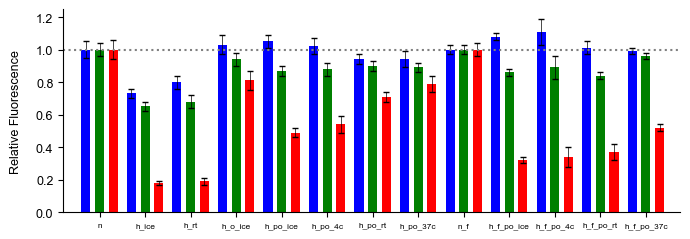

In [36]:
conditions = df_data_plot["condition"].to_list()
plot_xlabels = [conditions[i] for i in range(0, len(conditions), 3)]
rfu = df_data_plot["rfu"].to_list()
plot_rfu = [rfu[i:i + 3] for i in range(0, len(rfu), 3)]
std_err = df_data_plot["std_err"].to_list()
plot_std_err = [std_err[i:i + 3] for i in range(0, len(std_err), 3)]

# create plot
fig, ax = plt.subplots(1, 1, figsize=(7, 2.5))
x_ticks = []
for index, rfu_list in enumerate(plot_rfu):
    ax.bar(index-0.3, rfu_list[2], width=0.2, color="blue", align="center", label="blue")
    ax.errorbar(index-0.3, rfu_list[2], plot_std_err[index][2], color="k", capsize=2, elinewidth=0.5)
    ax.bar(index, rfu_list[1], width=0.2, color="green", align="center", label="green")
    ax.errorbar(index, rfu_list[1], plot_std_err[index][1], color="k", capsize=2, elinewidth=0.5)
    ax.bar(index+0.3, rfu_list[0], width=0.2, color="red", align="center", label="red")
    ax.errorbar(index+0.3, rfu_list[0], plot_std_err[index][0], color="k", capsize=2, elinewidth=0.5)
    x_ticks.append(index)
ax.axhline(y=1.0, color="grey", linestyle="dotted", linewidth=1.5)
ax.set_ylabel("Relative Fluorescence")
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2])
ax.set_xticks(x_ticks)
ax.set_xlim([x_ticks[0]-0.8, x_ticks[-1]+0.75])
ax.set_xticklabels(plot_xlabels)
ax.tick_params(axis='x', which='major', labelsize=6)
# plt.show()
plt.savefig(path_plots+"supp_figure_3.svg")

## Figure 2

### Figure 2D-2E statistical tests

In [ ]:
df = pd.read_csv(path_exp_data+"Exp05_pt1.csv")
print(df)

# run t-tests
comparisons = [
    ["cobalt_0", "cobalt_3"], 
    ["cobalt_0", "cobalt_15"], 
    ["cobalt_0", "cobalt_30"],
    ["cobalt_0", "cobalt_150"],
    ["cobalt_0", "cobalt_300"],
    ["cobalt_0", "cobalt_600"]
]
t_test_df = run_corrected_t_tests(path_stats, "figure2d-e", "meptrs", df, comparisons)
print(t_test_df)

### Figure 2D plot

In [ ]:
df_data_plot = pd.read_csv(path_exp_data+"plot_figure2D-E.csv")
# print(df_data_plot)
cobalt_doses = df_data_plot["cobalt_dose"].to_list()
meptrs = df_data_plot["meptrs"].to_list()
meptrs_scaled = [i/1E4 for i in meptrs]
std_err = df_data_plot["std_err"].to_list()
std_err_scaled = [i/1E4 for i in std_err]

# create figure 2D plot
fig, ax = plt.subplots(1, 1, figsize=(2.4, 2.4))
ax.errorbar(cobalt_doses, meptrs_scaled, std_err_scaled, color="deeppink", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5)
ax.set_xscale('symlog')
ax.set_xlim(right=1000)
ax.set_ylim(top=4)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel("CoCl2 dose (uM)")
ax.set_ylabel("Mean exp. (x10^4 MEPTRs)")
ax.set_box_aspect(1)
# plt.show()
plt.savefig(path_plots+"figure_2d.svg")

### Figure 2E plot

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(1.15, 1.9))

ax.bar(-0.15, meptrs_scaled[0], width=0.3, color="grey", align="center", label="untreated")
ax.bar(0.15, meptrs_scaled[-2], width=0.3, color="deeppink", align="center", label="cobalt")
ax.errorbar(-0.15, meptrs_scaled[0], std_err_scaled[0], color="k", capsize=2, elinewidth=0.5)
ax.errorbar(0.15, meptrs_scaled[-2], std_err_scaled[-2], color="k", capsize=2, elinewidth=0.5)
ax.set_xlim([-0.5, 0.5])
ax.set_xticklabels([])
ax.set_ylim(top=3.5)
ax.set_yticks([0, 1, 2, 3])
ax.set_ylabel("Mean exp. (x10^6 MEPTRs)")
# plt.show()
plt.savefig(path_plots+"figure_2e.svg")

### Figure 2G statistical tests

In [ ]:
df = pd.read_csv(path_exp_data+"Exp05_pt2_bins.csv")
# print(df)

# run 2-way ANOVA
# anova_table = anova(path_stats, "figure2g", df, "meptrs", "condition", "bin")
# print(anova_table)
# run tukey's hsd
# tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure2g", "meptrs", df, ["condition", "bin"], ["condition","bin"])
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

In [ ]:
# run 1 way ANOVA on fold induction for each condition
df_fold = df[df["fold"] != 1]
# print(df_fold)
# anova_table = anova(path_stats, "figure2g_fold", df_fold, "fold", "bin")
# print(anova_table)
# run tukey's hsd
# tukeys_tables = tukeys_hsd(path_stats, "figure2g_fold", "fold", df_fold, ["bin"])
# for table in tukeys_tables:
#     print(table)

### Figure 2G plot

In [ ]:
df_data_plot = pd.read_csv(path_exp_data+"plot_figure2G.csv")
# print(df_data_plot)

# format data and labels for plotting
meptrs = df_data_plot["meptrs"].to_list()
meptrs_scaled = [i/1E4 for i in meptrs]
plot_meptrs = [meptrs_scaled[i:i + 2] for i in range(0, len(meptrs_scaled), 2)]
std_err = df_data_plot["std_err"].to_list()
std_err_scaled = [i/1E4 for i in std_err]
plot_std_err = [std_err_scaled[i:i + 2] for i in range(0, len(std_err_scaled), 2)]
fi = df_data_plot["FI"].to_list()
plot_fi = [fi[i] for i in range(1, len(fi), 2)]
fi_std_err = df_data_plot["FI_std_err"].to_list()
plot_fi_std_err = [fi_std_err[i] for i in range(1, len(fi_std_err), 2)]
# create plot
fig, ax = plt.subplots(1, 1, figsize=(4, 2.5))
ax2 = ax.twinx()
for index, meptrs_list in enumerate(plot_meptrs):
    ax.bar(index+1-0.175, meptrs_list[0], width=0.35, color="grey", align="center", label="untreated")
    ax.errorbar(index+1-0.175, meptrs_list[0], plot_std_err[index][0], color="k", capsize=2, elinewidth=0.5)
    ax.bar(index+1+0.175, meptrs_list[1], width=0.35, color="deeppink", align="center", label="cobalt")
    ax.errorbar(index+1+0.175, meptrs_list[1], plot_std_err[index][1], color="k", capsize=2, elinewidth=0.5)
    ax2.errorbar(index+1, plot_fi[index], plot_fi_std_err[index], color="red", marker="o", markersize="4", linestyle="none", ecolor="k", capsize=2, elinewidth=0.5)

ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xlim(left=0.5, right=10.5)
ax.set_yticks([0, 2, 4, 6, 8, 10])
ax.set_xlabel("Bin (Decile of EBFP2 expression level)")
ax.set_ylabel("Mean exp. (x10^4 MEPTRs)")
ax.spines[['right']].set_visible(True)
ax2.set_yticks([0, 5, 10, 15, 20, 25, 30])
ax2.set_ylabel("Fold induction")
# plt.show()
plt.savefig(path_plots+"figure_2g.svg")

### Figure 2H statistical tests

In [3]:
df = pd.read_csv(path_exp_data+"Exp06.csv")
# print(df)

# run 2-way ANOVA
anova_table = anova(path_stats, "figure2h", df, "meptrs", "condition", "sorted_population")
print(anova_table)
# run tukey's hsd
# tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure2h", "meptrs", df, ["condition", "sorted_population"], ["condition","sorted_population"])
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

                                     df        sum_sq       mean_sq  \
C(condition)                        1.0  1.651535e+12  1.651535e+12   
C(sorted_population)               10.0  1.627704e+11  1.627704e+10   
C(condition):C(sorted_population)  10.0  1.586397e+11  1.586397e+10   
Residual                           44.0  5.263102e+09  1.196160e+08   

                                              F        PR(>F)  
C(condition)                       13806.977634  1.323722e-56  
C(sorted_population)                 136.077457  1.072550e-29  
C(condition):C(sorted_population)    132.624227  1.848711e-29  
Residual                                    NaN           NaN  


### Figure 2H plot

In [ ]:
#plot
df_data_plot = pd.read_csv(path_exp_data+"plot_figure2H.csv")
# print(df_data_plot)

# format data and labels for plotting
meptrs = df_data_plot["meptrs"].to_list()
meptrs_scaled = [i/1E4 for i in meptrs]
plot_meptrs = [meptrs_scaled[i:i + 2] for i in range(0, len(meptrs_scaled), 2)]
std_err = df_data_plot["std_err"].to_list()
std_err_scaled = [i/1E4 for i in std_err]
plot_std_err = [std_err_scaled[i:i + 2] for i in range(0, len(std_err_scaled), 2)]
fi = df_data_plot["FI"].to_list()
plot_fi = [fi[i] for i in range(1, len(fi), 2)]
fi_std_err = df_data_plot["FI_std_err"].to_list()
plot_fi_std_err = [fi_std_err[i] for i in range(1, len(fi_std_err), 2)]
# create plot
fig, ax = plt.subplots(1, 1, figsize=(3.75, 2.25))
ax2 = ax.twinx()
for index, meptrs_list in enumerate(plot_meptrs):
    ax.bar(index-0.175, meptrs_list[0], width=0.35, color="grey", align="center", label="untreated")
    ax.errorbar(index-0.175, meptrs_list[0], plot_std_err[index][0], color="k", capsize=2, elinewidth=0.5)
    ax.bar(index+0.175, meptrs_list[1], width=0.35, color="deeppink", align="center", label="cobalt")
    ax.errorbar(index+0.175, meptrs_list[1], plot_std_err[index][1], color="k", capsize=2, elinewidth=0.5)
    ax2.errorbar(index, plot_fi[index], plot_fi_std_err[index], color="red", marker="o", markersize="4", linestyle="none", ecolor="k", capsize=2, elinewidth=0.5)

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xlim(left=-0.5, right=10.5)
ax.set_yticks([0, 10, 20, 30, 40, 50])
ax.set_xlabel("Sorted population (on decile of EBFP2 expression)")
ax.set_ylabel("Mean exp. (x10^4 MEPTRs)")
ax.spines[['right']].set_visible(True)
ax2.set_yticks([0, 100, 200, 300])
ax2.set_ylabel("Fold induction")
# plt.show()
plt.savefig(path_plots+"figure_2h.svg")

## Figure 3

### Figure 3C, top statistical tests

In [ ]:
df = pd.read_csv(path_exp_data+"Exp04_pt2_YBTATA.csv")
# print(df)

In [ ]:
# run 2-way repeated measures ANOVA
# anova_rm_table = repeated_measures_anova(path_stats, "figure3c_top", df, "meptrs", "day", "condition")
# print(anova_rm_table)

# run tukey's hsd
# tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure3c_top", "meptrs", df, ["condition", "day"], ["condition","day"]) 
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

### Figure 3C, top plot

In [19]:
df_plot = pd.read_csv(path_exp_data+"plot_figure3C_top.csv")
print(df_plot)
days = [0, 1, 2, 3, 4, 5]

          condition  day        meptrs       std_err
0          normoxia    0  1.626201e+03     90.218468
1          normoxia    1  1.088635e+03     71.984131
2          normoxia    2  1.223716e+03    178.930581
3          normoxia    3  9.680467e+03    413.577763
4          normoxia    4  5.793373e+04   2206.099702
5          normoxia    5  1.274130e+05   6006.803847
6   normoxia_cobalt    0  1.626201e+03     90.218468
7   normoxia_cobalt    1  1.498463e+05   5500.702088
8   normoxia_cobalt    2  1.463696e+05   2846.692778
9   normoxia_cobalt    3  1.290738e+05   4928.218806
10  normoxia_cobalt    4  1.627349e+05   2744.686591
11  normoxia_cobalt    5  2.902854e+05  32858.643490
12          hypoxia    0  1.626201e+03     90.218468
13          hypoxia    1  5.116018e+05  47916.682400
14          hypoxia    2  1.350227e+06  22026.854350
15          hypoxia    3  1.679482e+06  15474.038940
16          hypoxia    4  1.899947e+06  54194.678590
17          hypoxia    5  2.165256e+06  55424.

In [20]:
# normoxia data
meptrs_normoxia = df_plot[df_plot["condition"] == "normoxia"]["meptrs"].to_list()
meptrs_normoxia_scaled = [i/1E6 for i in meptrs_normoxia]
std_err_normoxia = df_plot[df_plot["condition"] == "normoxia"]["std_err"].to_list()
std_err_normoxia_scaled = [i/1E6 for i in std_err_normoxia]

In [21]:
# normoxia + cobalt data
meptrs_normoxia_cobalt = df_plot[df_plot["condition"] == "normoxia_cobalt"]["meptrs"].to_list()
meptrs_normoxia_cobalt_scaled = [i/1E6 for i in meptrs_normoxia_cobalt]
std_err_normoxia_cobalt = df_plot[df_plot["condition"] == "normoxia_cobalt"]["std_err"].to_list()
std_err_normoxia_cobalt_scaled = [i/1E6 for i in std_err_normoxia_cobalt]

In [22]:
# hypoxia data
meptrs_hypoxia = df_plot[df_plot["condition"] == "hypoxia"]["meptrs"].to_list()
meptrs_hypoxia_scaled = [i/1E6 for i in meptrs_hypoxia]
std_err_hypoxia = df_plot[df_plot["condition"] == "hypoxia"]["std_err"].to_list()
std_err_hypoxia_scaled = [i/1E6 for i in std_err_hypoxia]

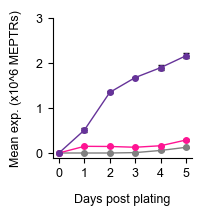

In [23]:
# create figure 2D plot
fig, ax = plt.subplots(1, 1, figsize=(2.25, 2.25), sharey=True)
ax.errorbar(days, meptrs_normoxia_scaled, std_err_normoxia_scaled, color="gray", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5, label="normoxia")
ax.errorbar(days, meptrs_normoxia_cobalt_scaled, std_err_normoxia_cobalt_scaled, color="deeppink", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5, label="normoxia_cobalt")
ax.errorbar(days, meptrs_hypoxia_scaled, std_err_hypoxia_scaled, color="rebeccapurple", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5, label="hypoxia")
ax.set_xlabel("Days post plating")
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_ylabel("Mean exp. (x10^6 MEPTRs)")
ax.set_ylim(top=3.0)
ax.set_box_aspect(1)
# plt.show()
plt.savefig(path_plots+"figure_3c_top.svg")

### Figure 3C, bottom statistical tests

In [ ]:
df = pd.read_csv(path_exp_data+"Exp04_pt3_CMV.csv")
# print(df)

In [ ]:
# run 2-way repeated measures ANOVA
# anova_rm_table = repeated_measures_anova(path_stats, "figure3c_bottom", df, "meptrs", "day", "condition")
# print(anova_rm_table)

# run tukey's hsd
# tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure3c_bottom", "meptrs", df, ["condition", "day"], ["condition","day"]) 
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

### Figure 3C, bottom plot

In [24]:
df_plot = pd.read_csv(path_exp_data+"plot_figure3C_bottom.csv")
print(df_plot)
days = [0, 1, 2, 3, 4, 5]

          condition  day        meptrs        std_err
0          normoxia    0  5.360905e+04    3460.636595
1          normoxia    1  3.939295e+04     752.438260
2          normoxia    2  3.345763e+04    2708.511678
3          normoxia    3  7.237088e+04    6252.243855
4          normoxia    4  2.115829e+05   11118.889210
5          normoxia    5  2.695357e+05   10657.652120
6   normoxia_cobalt    0  5.360905e+04    3460.636595
7   normoxia_cobalt    1  6.595375e+05   23211.844670
8   normoxia_cobalt    2  7.653391e+05   55451.839790
9   normoxia_cobalt    3  8.276165e+05   43420.765410
10  normoxia_cobalt    4  1.038319e+06   97537.855370
11  normoxia_cobalt    5  8.170270e+05   69398.781560
12          hypoxia    0  5.360905e+04    3460.636595
13          hypoxia    1  1.235921e+06   25640.415630
14          hypoxia    2  2.942400e+06   63314.003560
15          hypoxia    3  3.883229e+06   81660.281560
16          hypoxia    4  4.325980e+06  119951.754800
17          hypoxia    5  4.

In [25]:
# normoxia data
meptrs_normoxia = df_plot[df_plot["condition"] == "normoxia"]["meptrs"].to_list()
meptrs_normoxia_scaled = [i/1E6 for i in meptrs_normoxia]
std_err_normoxia = df_plot[df_plot["condition"] == "normoxia"]["std_err"].to_list()
std_err_normoxia_scaled = [i/1E6 for i in std_err_normoxia]

In [26]:
# normoxia + cobalt data
meptrs_normoxia_cobalt = df_plot[df_plot["condition"] == "normoxia_cobalt"]["meptrs"].to_list()
meptrs_normoxia_cobalt_scaled = [i/1E6 for i in meptrs_normoxia_cobalt]
std_err_normoxia_cobalt = df_plot[df_plot["condition"] == "normoxia_cobalt"]["std_err"].to_list()
std_err_normoxia_cobalt_scaled = [i/1E6 for i in std_err_normoxia_cobalt]

In [27]:
# hypoxia data
meptrs_hypoxia = df_plot[df_plot["condition"] == "hypoxia"]["meptrs"].to_list()
meptrs_hypoxia_scaled = [i/1E6 for i in meptrs_hypoxia]
std_err_hypoxia = df_plot[df_plot["condition"] == "hypoxia"]["std_err"].to_list()
std_err_hypoxia_scaled = [i/1E6 for i in std_err_hypoxia]

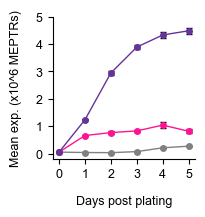

In [28]:
# create figure 2D plot
fig, ax = plt.subplots(1, 1, figsize=(2.25, 2.25), sharey=True)
ax.errorbar(days, meptrs_normoxia_scaled, std_err_normoxia_scaled, color="gray", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5, label="normoxia")
ax.errorbar(days, meptrs_normoxia_cobalt_scaled, std_err_normoxia_cobalt_scaled, color="deeppink", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5, label="normoxia_cobalt")
ax.errorbar(days, meptrs_hypoxia_scaled, std_err_hypoxia_scaled, color="rebeccapurple", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5, label="hypoxia")
ax.set_xlabel("Days post plating")
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_ylabel("Mean exp. (x10^6 MEPTRs)")
ax.set_yticks([0, 1, 2, 3, 4, 5])
ax.set_ylim(top=5.0)
ax.set_box_aspect(1)
# plt.show()
plt.savefig(path_plots+"figure_3c_bottom.svg")

## Figure 4

### Figure 4B statistical tests

In [ ]:
df = pd.read_csv(path_exp_data+"Exp04_pt4_dox_HIF.csv")
# print(df)

In [ ]:
# run 2-way repeated measures ANOVA
# anova_rm_table = repeated_measures_anova(path_stats, "figure4b", df, "meptrs", "day", "condition")
# print(anova_rm_table)

# run tukey's hsd
# tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure4b", "meptrs", df, ["condition", "day"], ["condition","day"]) 
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

### Figure 4B plot

In [2]:
df_data_plot = pd.read_csv(path_exp_data+"plot_figure4B.csv")
# print(df_data_plot)
days = [0, 1, 2, 3, 4, 5]

In [3]:
# normoxia data
meptrs_normoxia = df_data_plot[df_data_plot["condition"] == "normoxia"]["meptrs"].to_list()
meptrs_normoxia_scaled = [i/1E6 for i in meptrs_normoxia]
std_err_normoxia = df_data_plot[df_data_plot["condition"] == "normoxia"]["std_err"].to_list()
std_err_normoxia_scaled = [i/1E6 for i in std_err_normoxia]

In [4]:
# normoxia cobalt data
meptrs_normoxia_cobalt = df_data_plot[df_data_plot["condition"] == "normoxia_cobalt"]["meptrs"].to_list()
meptrs_normoxia_cobalt_scaled = [i/1E6 for i in meptrs_normoxia_cobalt]
std_err_normoxia_cobalt = df_data_plot[df_data_plot["condition"] == "normoxia_cobalt"]["std_err"].to_list()
std_err_normoxia_cobalt_scaled = [i/1E6 for i in std_err_normoxia_cobalt]

In [5]:
# normoxia dox data
meptrs_normoxia_dox = df_data_plot[df_data_plot["condition"] == "normoxia_dox"]["meptrs"].to_list()
meptrs_normoxia_dox_scaled = [i/1E6 for i in meptrs_normoxia_dox]
std_err_normoxia_dox = df_data_plot[df_data_plot["condition"] == "normoxia_dox"]["std_err"].to_list()
std_err_normoxia_dox_scaled = [i/1E6 for i in std_err_normoxia_dox]

In [6]:
# hypoxia data
meptrs_hypoxia = df_data_plot[df_data_plot["condition"] == "hypoxia"]["meptrs"].to_list()
meptrs_hypoxia_scaled = [i/1E6 for i in meptrs_hypoxia]
std_err_hypoxia = df_data_plot[df_data_plot["condition"] == "hypoxia"]["std_err"].to_list()
std_err_hypoxia_scaled = [i/1E6 for i in std_err_hypoxia]

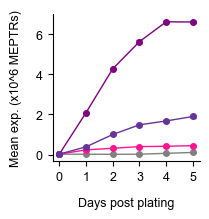

In [9]:
# create figure 2D plot
fig, ax = plt.subplots(1, 1, figsize=(2.25, 2.25))
ax.errorbar(days, meptrs_normoxia_scaled, std_err_normoxia_scaled, color="gray", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="gray", capsize=2, elinewidth=0.5, label="normoxia")
ax.errorbar(days, meptrs_normoxia_cobalt_scaled, std_err_normoxia_cobalt_scaled, color="deeppink", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="deeppink", capsize=2, elinewidth=0.5, label="normoxia_cobalt")
ax.errorbar(days, meptrs_normoxia_dox_scaled, std_err_normoxia_dox_scaled, color="purple", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="purple", capsize=2, elinewidth=0.5, label="normoxia_dox")
ax.errorbar(days, meptrs_hypoxia_scaled, std_err_hypoxia_scaled, color="rebeccapurple", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="rebeccapurple", capsize=2, elinewidth=0.5, label="hypoxia")
ax.set_xlabel("Days post plating")
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_ylabel("Mean exp. (x10^6 MEPTRs)")
# ax.set_ylim(top=6.0)
ax.set_box_aspect(1)
# plt.show()
plt.savefig(path_plots+"figure_4b.svg")

## Figure 5

### Figure 5B statistical tests

### Figure 5B plot

### Figure 5D statistical tests

### Figure 5D plot

### Figure 5E Statistical Tests

In [ ]:
df = pd.read_csv(path_exp_data+"Exp10.csv")
df_hypoxic = df[df["day"] != "normoxic"].copy()

# run 2-way repeated measures ANOVA
# anova_rm_table = repeated_measures_anova(path_stats, "figure5e", df_hypoxic, "meptrs", "day", "condition")
# print(anova_rm_table)

# run tukey's hsd
# tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure5e", "meptrs", df_hypoxic, ["condition", "day"], ["condition","day"]) 
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

# run t-tests for each day vs. normoxia for simple, h1a fb, h2a fb
# format df for t-test code
# df["condition"] = df["condition"] + "_" + df["day"].astype(str)
# # print(df)
# comparisons = [
#     ["simple_hbs_0", "simple_hbs_normoxic"],
#     ["simple_hbs_1", "simple_hbs_normoxic"],
#     ["simple_hbs_2", "simple_hbs_normoxic"],
#     ["simple_hbs_3", "simple_hbs_normoxic"],
#     ["simple_hbs_4", "simple_hbs_normoxic"],
#     ["simple_hbs_5", "simple_hbs_normoxic"],
#     ["h1a_fb_hbs_0", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_1", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_2", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_3", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_4", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_5", "h1a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_0", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_1", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_2", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_3", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_4", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_5", "h2a_fb_hbs_normoxic"]
# ]
# t_test_df = run_corrected_t_tests(path_stats, "figure5e", "meptrs", df, comparisons)
# print(t_test_df)

### Figure 5E Plots

In [10]:
df_data_plot = pd.read_csv(path_exp_data+"plot_figure5E.csv")
# print(df_data_plot)
df_hypoxia_data = df_data_plot[df_data_plot["day"] != "baseline"].copy()
df_normoxia_data = df_data_plot[df_data_plot["day"] == "baseline"].copy()
days = [0, 1, 2, 3, 4, 5]

In [11]:
# simple HBS data
meptrs_hypoxia_simple = df_hypoxia_data[df_hypoxia_data["condition"] == "simple_hbs"]["meptrs"].to_list()
meptrs_hypoxia_simple_scaled = [i/1E6 for i in meptrs_hypoxia_simple]
std_err_hypoxia_simple = df_hypoxia_data[df_hypoxia_data["condition"] == "simple_hbs"]["std_err"].to_list()
std_err_hypoxia_simple_scaled = [i/1E6 for i in std_err_hypoxia_simple]
meptrs_normoxia_simple = df_normoxia_data[df_normoxia_data["condition"] == "simple_hbs"]["meptrs"].to_list()[0]
meptrs_normoxia_simple_scaled = meptrs_normoxia_simple/1E6
std_err_normoxia_simple = df_normoxia_data[df_normoxia_data["condition"] == "simple_hbs"]["std_err"].to_list()[0]
std_err_normoxia_simple_scaled = std_err_normoxia_simple/1E6


In [12]:
# h1a fb HBS data
meptrs_hypoxia_h1a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h1a_fb_hbs"]["meptrs"].to_list()
meptrs_hypoxia_h1a_fb_scaled = [i/1E6 for i in meptrs_hypoxia_h1a_fb]
std_err_hypoxia_h1a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h1a_fb_hbs"]["std_err"].to_list()
std_err_hypoxia_h1a_fb_scaled = [i/1E6 for i in std_err_hypoxia_h1a_fb]
meptrs_normoxia_h1a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h1a_fb_hbs"]["meptrs"].to_list()[0]
meptrs_normoxia_h1a_fb_scaled = meptrs_normoxia_h1a_fb/1E6
std_err_normoxia_h1a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h1a_fb_hbs"]["std_err"].to_list()[0]
std_err_normoxia_h1a_fb_scaled = std_err_normoxia_h1a_fb/1E6

In [13]:
# h2a fb data
meptrs_hypoxia_h2a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h2a_fb_hbs"]["meptrs"].to_list()
meptrs_hypoxia_h2a_fb_scaled = [i/1E6 for i in meptrs_hypoxia_h2a_fb]
std_err_hypoxia_h2a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h2a_fb_hbs"]["std_err"].to_list()
std_err_hypoxia_h2a_fb_scaled = [i/1E6 for i in std_err_hypoxia_h2a_fb]
meptrs_normoxia_h2a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h2a_fb_hbs"]["meptrs"].to_list()[0]
meptrs_normoxia_h2a_fb_scaled = meptrs_normoxia_h2a_fb/1E6
std_err_normoxia_h2a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h2a_fb_hbs"]["std_err"].to_list()[0]
std_err_normoxia_h2a_fb_scaled = std_err_normoxia_h2a_fb/1E6

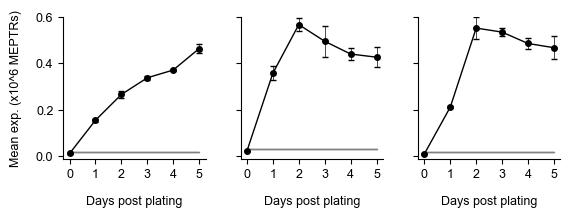

In [16]:
# create figure 2D plot
fig, axs = plt.subplots(1, 3, figsize=(6, 2.25), sharey=True)
axs = axs.ravel()
axs[0].errorbar(days, meptrs_hypoxia_simple_scaled, std_err_hypoxia_simple_scaled, color="black", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5)
axs[0].fill_between(
    days, meptrs_normoxia_simple_scaled-std_err_normoxia_simple_scaled, 
    meptrs_normoxia_simple_scaled+std_err_normoxia_simple_scaled, color="gray")
axs[0].set_xlabel("Days post plating")
axs[0].set_xticks([0, 1, 2, 3, 4, 5])
axs[0].set_ylabel("Mean exp. (x10^6 MEPTRs)")
axs[0].set_ylim(top=0.6)
axs[0].set_box_aspect(1)
axs[1].errorbar(days, meptrs_hypoxia_h1a_fb_scaled, std_err_hypoxia_h1a_fb_scaled, color="black", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5)
axs[1].fill_between(
    days, meptrs_normoxia_h1a_fb_scaled-std_err_normoxia_h1a_fb_scaled, 
    meptrs_normoxia_h1a_fb_scaled+std_err_normoxia_h1a_fb_scaled, color="gray")
axs[1].set_xlabel("Days post plating")
axs[1].set_xticks([0, 1, 2, 3, 4, 5])
axs[1].set_box_aspect(1)
axs[2].errorbar(days, meptrs_hypoxia_h2a_fb_scaled, std_err_hypoxia_h2a_fb_scaled, color="black", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5)
axs[2].fill_between(
    days, meptrs_normoxia_h2a_fb_scaled-std_err_normoxia_h2a_fb_scaled, 
    meptrs_normoxia_h2a_fb_scaled+std_err_normoxia_h2a_fb_scaled, color="gray")
axs[2].set_xlabel("Days post plating")
axs[2].set_xticks([0, 1, 2, 3, 4, 5])
axs[2].set_box_aspect(1)
# plt.show()
plt.savefig(path_plots+"figure_5e.svg")

### Figure 5F Statistical tests

In [ ]:
df = pd.read_csv(path_exp_data+"Exp11.csv")
df_hypoxic = df[df["day"] != "normoxic"].copy()
# print(df_hypoxic)
# run 2-way repeated measures ANOVA
# anova_rm_table = repeated_measures_anova(path_stats, "figure5f", df_hypoxic, "meptrs", "day", "condition")
# print(anova_rm_table)

# run tukey's hsd
# tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure5f", "meptrs", df_hypoxic, ["condition", "day"], ["condition","day"]) 
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

# run t-tests for each day vs. normoxia for simple, h1a fb, h2a fb
# format df for t-test code
df["condition"] = df["condition"] + "_" + df["day"].astype(str)
# print(df)
comparisons = [
    ["simple_hbs_0", "simple_hbs_normoxic"],
    ["simple_hbs_1", "simple_hbs_normoxic"],
    ["simple_hbs_2", "simple_hbs_normoxic"],
    ["simple_hbs_3", "simple_hbs_normoxic"],
    ["simple_hbs_4", "simple_hbs_normoxic"],
    ["simple_hbs_5", "simple_hbs_normoxic"],
    ["h1a_fb_hbs_0", "h1a_fb_hbs_normoxic"],
    ["h1a_fb_hbs_1", "h1a_fb_hbs_normoxic"],
    ["h1a_fb_hbs_2", "h1a_fb_hbs_normoxic"],
    ["h1a_fb_hbs_3", "h1a_fb_hbs_normoxic"],
    ["h1a_fb_hbs_4", "h1a_fb_hbs_normoxic"],
    ["h1a_fb_hbs_5", "h1a_fb_hbs_normoxic"],
    ["h2a_fb_hbs_0", "h2a_fb_hbs_normoxic"],
    ["h2a_fb_hbs_1", "h2a_fb_hbs_normoxic"],
    ["h2a_fb_hbs_2", "h2a_fb_hbs_normoxic"],
    ["h2a_fb_hbs_3", "h2a_fb_hbs_normoxic"],
    ["h2a_fb_hbs_4", "h2a_fb_hbs_normoxic"],
    ["h2a_fb_hbs_5", "h2a_fb_hbs_normoxic"]
]
t_test_df = run_corrected_t_tests(path_stats, "figure5f", "meptrs", df, comparisons)
print(t_test_df)

### Figure 5F plots

In [17]:
df_data_plot = pd.read_csv(path_exp_data+"plot_figure5F.csv")
# print(df_data_plot)
df_hypoxia_data = df_data_plot[df_data_plot["day"] != "baseline"].copy()
df_normoxia_data = df_data_plot[df_data_plot["day"] == "baseline"].copy()
days = [0, 1, 2, 3, 4, 5]

In [18]:
# simple HBS data
meptrs_hypoxia_simple = df_hypoxia_data[df_hypoxia_data["condition"] == "simple_hbs"]["meptrs"].to_list()
meptrs_hypoxia_simple_scaled = [i/1E6 for i in meptrs_hypoxia_simple]
std_err_hypoxia_simple = df_hypoxia_data[df_hypoxia_data["condition"] == "simple_hbs"]["std_err"].to_list()
std_err_hypoxia_simple_scaled = [i/1E6 for i in std_err_hypoxia_simple]
meptrs_normoxia_simple = df_normoxia_data[df_normoxia_data["condition"] == "simple_hbs"]["meptrs"].to_list()[0]
meptrs_normoxia_simple_scaled = meptrs_normoxia_simple/1E6
std_err_normoxia_simple = df_normoxia_data[df_normoxia_data["condition"] == "simple_hbs"]["std_err"].to_list()[0]
std_err_normoxia_simple_scaled = std_err_normoxia_simple/1E6

In [19]:
# h1a fb HBS data
meptrs_hypoxia_h1a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h1a_fb_hbs"]["meptrs"].to_list()
meptrs_hypoxia_h1a_fb_scaled = [i/1E6 for i in meptrs_hypoxia_h1a_fb]
std_err_hypoxia_h1a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h1a_fb_hbs"]["std_err"].to_list()
std_err_hypoxia_h1a_fb_scaled = [i/1E6 for i in std_err_hypoxia_h1a_fb]
meptrs_normoxia_h1a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h1a_fb_hbs"]["meptrs"].to_list()[0]
meptrs_normoxia_h1a_fb_scaled = meptrs_normoxia_h1a_fb/1E6
std_err_normoxia_h1a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h1a_fb_hbs"]["std_err"].to_list()[0]
std_err_normoxia_h1a_fb_scaled = std_err_normoxia_h1a_fb/1E6

In [20]:
# h2a fb HBS data
meptrs_hypoxia_h2a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h2a_fb_hbs"]["meptrs"].to_list()
meptrs_hypoxia_h2a_fb_scaled = [i/1E6 for i in meptrs_hypoxia_h2a_fb]
std_err_hypoxia_h2a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h2a_fb_hbs"]["std_err"].to_list()
std_err_hypoxia_h2a_fb_scaled = [i/1E6 for i in std_err_hypoxia_h2a_fb]
meptrs_normoxia_h2a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h2a_fb_hbs"]["meptrs"].to_list()[0]
meptrs_normoxia_h2a_fb_scaled = meptrs_normoxia_h2a_fb/1E6
std_err_normoxia_h2a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h2a_fb_hbs"]["std_err"].to_list()[0]
std_err_normoxia_h2a_fb_scaled = std_err_normoxia_h2a_fb/1E6

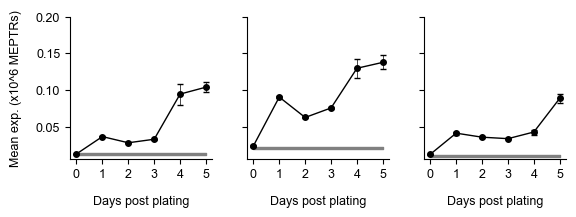

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(6.05, 2.25), sharey=True)
axs = axs.ravel()
axs[0].errorbar(days, meptrs_hypoxia_simple_scaled, std_err_hypoxia_simple_scaled, color="black", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5)
axs[0].fill_between(
    days, meptrs_normoxia_simple_scaled-std_err_normoxia_simple_scaled, 
    meptrs_normoxia_simple_scaled+std_err_normoxia_simple_scaled, color="gray")
axs[0].set_xlabel("Days post plating")
axs[0].set_xticks([0, 1, 2, 3, 4, 5])
axs[0].set_ylabel("Mean exp. (x10^6 MEPTRs)")
axs[0].set_ylim(top=0.2)
axs[0].set_box_aspect(1)
axs[1].errorbar(days, meptrs_hypoxia_h1a_fb_scaled, std_err_hypoxia_h1a_fb_scaled, color="black", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5)
axs[1].fill_between(
    days, meptrs_normoxia_h1a_fb_scaled-std_err_normoxia_h1a_fb_scaled, 
    meptrs_normoxia_h1a_fb_scaled+std_err_normoxia_h1a_fb_scaled, color="gray")
axs[1].set_xlabel("Days post plating")
axs[1].set_xticks([0, 1, 2, 3, 4, 5])
axs[1].set_box_aspect(1)
axs[2].errorbar(days, meptrs_hypoxia_h2a_fb_scaled, std_err_hypoxia_h2a_fb_scaled, color="black", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5)
axs[2].fill_between(
    days, meptrs_normoxia_h2a_fb_scaled-std_err_normoxia_h2a_fb_scaled, 
    meptrs_normoxia_h2a_fb_scaled+std_err_normoxia_h2a_fb_scaled, color="gray")
axs[2].set_xlabel("Days post plating")
axs[2].set_xticks([0, 1, 2, 3, 4, 5])
axs[2].set_box_aspect(1)
# plt.show()
plt.savefig(path_plots+"figure_5f.svg")